# Part A- Data Pre-Processing

## Step 1- Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Step 2- Import Dataset

In [2]:
dataset=pd.read_csv("Salary_Data.csv")

In [3]:
dataset

,Experience in years,Employee Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


## Step 3- To create Feature vector(X) and Dependent variable vector(Y)

In [4]:
# feature vector becoz only 1 column
x=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values

In [5]:
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [6]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

## Step 4- Replace missing values         

In [7]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:,:])
x[:,:]=imputer.transform(x[:,:])

## Step 5- Encoding

In [8]:
## Not required because no categorical data

## Step 6- Splitting dataset into training and testing dataset

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

## Step 7- Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain[:,:]=sc.fit_transform(xtrain[:, :])
xtest[:,:]=sc.fit_transform(xtest[:, :])

# Step B- Building my Linear Regression model

## Step 1- Training the model 

In [13]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()             
LR.fit(xtrain,ytrain)

LinearRegression()

## Step 2- Testing the linear model

In [14]:
yestimate=LR.predict(xtest)

In [15]:
yestimate

array([ 67125.93607852, 111550.81960741,  32573.24888938,  84402.27967309,
        47381.54339901, 104146.6723526 ])

In [16]:
ytest

array([83088, 98273, 63218, 93940, 61111, 91738], dtype=int64)

## Step 3- Visualising the data

### Training Data

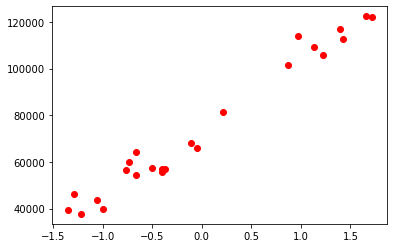

In [17]:
plt.scatter(xtrain,ytrain,color='red')

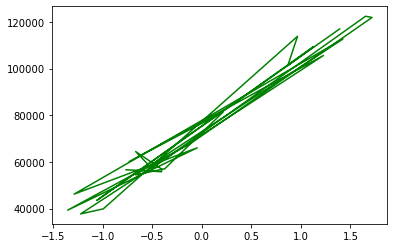

In [19]:
plt.plot(xtrain,ytrain, color='green')

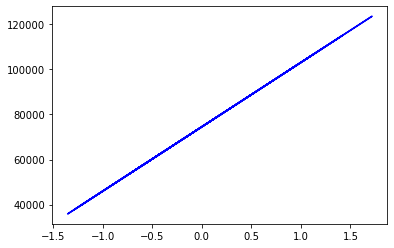

In [20]:
plt.plot(xtrain,LR.predict(xtrain),color='blue')

Text(0.5, 1.0, 'plotting for training dataset')

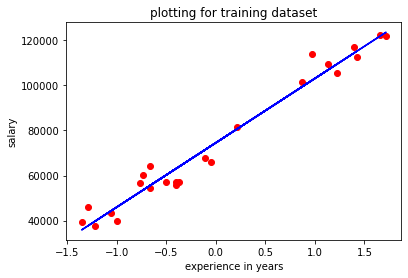

In [21]:
plt.scatter(xtrain,ytrain,color='red')
plt.plot(xtrain,LR.predict(xtrain),color='blue')
plt.xlabel('experience in years')
plt.ylabel('salary')
plt.title('plotting for training dataset')

## Testing data

Text(0.5, 1.0, 'plotting for testing dataset')

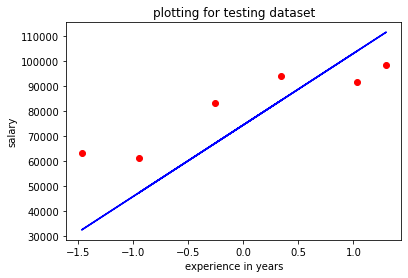

In [22]:
plt.scatter(xtest,ytest,color='red')
plt.plot(xtest,LR.predict(xtest),color='blue')
plt.xlabel('experience in years')
plt.ylabel('salary')
plt.title('plotting for testing dataset')

In [24]:
LR.coef_

array([28569.73367533])

In [25]:
LR.intercept_   

74530.08333333333

#### Predict the salary when the person has been working for 5 years

In [26]:
LR.predict([[5]]) 

array([217378.75170998])

In [27]:
print((LR.coef_ * 5)+LR.intercept_)

[217378.75170998]


In [30]:
xtest

array([[-0.25916053],
       [ 1.29580264],
       [-1.46857632],
       [ 0.34554737],
       [-0.95025527],
       [ 1.03664211]])